# Cryptocurrency Clusters

In [145]:
import pandas as pd
from pathlib import Path
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [146]:
crypto_df = pd.read_csv(Path('resources/crypto_data.csv'))
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


### Data Cleanup

In [147]:
crypto_clean_df = crypto_df[crypto_df['IsTrading'] == True]
crypto_clean_df = crypto_clean_df.drop(['IsTrading', 'Unnamed: 0', 'CoinName'], axis=1)
crypto_clean_df = crypto_clean_df.dropna()
crypto_clean_df = crypto_clean_df[crypto_clean_df['TotalCoinsMined'] > 0]
crypto_clean_df['TotalCoinSupply'] = pd.to_numeric(crypto_clean_df['TotalCoinSupply'])
crypto_clean_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
2,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
5,X13,PoW/PoS,2.927942e+10,3.141593e+11
7,SHA-256,PoW,1.792718e+07,2.100000e+07
8,Ethash,PoW,1.076842e+08,0.000000e+00


### Convert data to numerical using get_dummies()

In [148]:
crypto_dummies = pd.get_dummies(crypto_clean_df)
crypto_dummies.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Standardize the dataset with StandardScaler()

In [149]:
scaler = StandardScaler()
scaled = scaler.fit_transform(crypto_dummies)
scaled_df = pd.DataFrame(scaled)
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,-0.117108,-0.152870,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
1,-0.093970,-0.145009,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
2,0.524946,4.489424,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
3,-0.116715,-0.152560,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
4,-0.114747,-0.152870,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396


### Dimensionality Reduction - How did the number of the features change?
PCA with 90% of the explained variance reduces the amount of features from 98 to 74.

In [150]:
pca = PCA(n_components=0.9)

crypto_sd_pca = pca.fit_transform(scaled_df)
crypto_sd_pca = pd.DataFrame(crypto_sd_pca)
crypto_sd_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-6.043801e-12,1.847309e-14,1.013369e-14,-0.007129,-1.319756,-0.051813,...,-1.677778e-15,-4.596658e-16,7.777740e-16,3.203620e-15,-4.669662e-15,-7.875856e-16,1.360104e-15,2.863709e-15,-2.410108e-16,-4.316693e-15
1,-0.318434,1.032331,-0.591126,0.001386,-5.993534e-12,1.845968e-14,1.022985e-14,-0.007739,-1.322514,-0.056674,...,-1.095984e-15,-2.910372e-16,1.834856e-16,3.220514e-15,-3.675575e-15,-9.388027e-16,2.023778e-15,3.113733e-15,-1.745890e-16,-4.482185e-15
2,2.305468,1.656383,-0.683617,0.004731,-2.061981e-11,3.467748e-14,3.540131e-14,-0.054781,-1.542879,-0.943951,...,4.267955e-14,3.952655e-14,-7.571219e-14,-5.200960e-14,1.410566e-13,-1.019401e-14,5.695643e-14,-2.763100e-14,7.715238e-14,-5.481813e-14
3,-0.145184,-1.320593,0.192813,-0.001229,5.355326e-12,-7.922184e-15,-6.824363e-15,-0.002071,0.281463,0.251862,...,-7.991496e-15,6.941662e-15,-1.368862e-14,-1.450731e-14,2.085161e-14,-1.254277e-14,-8.305267e-15,7.937065e-15,1.565953e-14,-3.841119e-15
4,-0.151768,-2.036192,0.396182,-0.001705,7.421485e-12,-1.089537e-14,-1.643773e-14,0.027735,0.519099,0.188820,...,-1.469901e-15,6.292352e-14,1.113939e-13,-1.309083e-13,3.676314e-14,-1.173622e-13,-6.286312e-14,4.548241e-15,-7.689903e-14,-1.446637e-14


In [151]:
tsne = TSNE(learning_rate=100)
tsne_feat = tsne.fit_transform(crypto_sd_pca)
tsne_feat

array([[-10.291549 ,   9.66102  ],
       [-14.695637 ,  14.751382 ],
       [-19.776628 ,  20.496761 ],
       ...,
       [ 17.918045 ,  15.9257   ],
       [ 22.931833 ,   4.8138647],
       [  4.40806  , -12.249617 ]], dtype=float32)

### Cluster Analysis - How many clusters are distinct?
2 large distinct clusters and 3 small distinct clusters

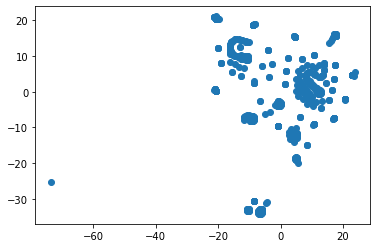

In [152]:
plt.scatter(tsne_feat[:,0], tsne_feat[:,1])
plt.show()

In [153]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_feat)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\Mastermind\anaconda3\envs\PyEnv\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


,k,inertia
0,1,185552.125000
1,2,115308.531250
2,3,56157.417969
3,4,34624.132812
4,5,29109.029297


### k-means location
The elbow appears to be located at 3 or 4 clusters

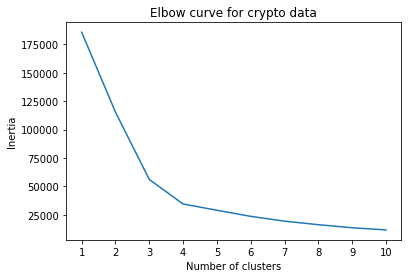

In [154]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for crypto data')
plt.show()

### Recommendation - Can the cryptocurrencies be clustered together? If so, into how many clusters?

With the analysis considered, we can cluseter the cryptocurrencies into 3 or 4 clusters. The explained variance in our elbow curve points to 3 or 4 as the number to use.